In [ ]:
pip install mplfinance pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define paths
csv_file_path = 'ADANIPORTS.csv'  # Update this path to your actual CSV file path
output_folder = 'candlestick_images'  # Folder to save candlestick images

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Load the CSV data
try:
    stock_data = pd.read_csv(csv_file_path)

    # Ensure required columns exist
    required_columns = {'Date', 'Open', 'High', 'Low', 'Close'}
    if not required_columns.issubset(stock_data.columns):
        raise ValueError(f"The CSV file must contain these columns: {', '.join(required_columns)}")

    # Convert 'Date' column to datetime
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    stock_data = stock_data.sort_values('Date')  # Sort data by date

    # Generate candlestick images for each day in stock data
    for _, row in stock_data.iterrows():
        date, open_price, high_price, low_price, close_price = row['Date'], row['Open'], row['High'], row['Low'], row['Close']

        # Initialize a figure and axis
        fig, ax = plt.subplots(figsize=(2, 4))  # Aspect ratio for candlestick chart
        color = 'green' if close_price >= open_price else 'red'  # Green for bullish, red for bearish

        # Plot candlestick body
        ax.bar(date, abs(close_price - open_price), bottom=min(open_price, close_price), color=color, width=0.4)

        # Plot high and low wicks
        ax.vlines(date, low_price, high_price, color='black', linewidth=0.6)

        # Adjust plot aesthetics
        ax.set_xlim(date - pd.Timedelta(days=0.5), date + pd.Timedelta(days=0.5))
        ax.set_ylim(low_price - (0.05 * low_price), high_price + (0.05 * high_price))
        ax.axis('off')  # Hide axes

        # Save the figure
        image_path = os.path.join(output_folder, f"{date.strftime('%Y-%m-%d')}.png")
        plt.savefig(image_path, bbox_inches='tight', pad_inches=0.1)
        plt.close(fig)  # Close the figure to free memory

    print(f"Candlestick images successfully saved in the '{output_folder}' folder.")

except FileNotFoundError:
    print(f"Error: The file '{csv_file_path}' was not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

Candlestick images successfully saved in the 'candlestick_images' folder.


In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Specify the path to the folder containing your candlestick images
# **Update the path to the actual location of your candlestick images folder on Google Drive**
image_folder_path = '/content/drive/My Drive/candlestick_images'

# List the images in the folder
print("Candlestick images in the folder:")

# Check if the directory exists before listing its content
if os.path.exists(image_folder_path):
    print(os.listdir(image_folder_path))
else:
    print(f"Error: Directory '{image_folder_path}' not found.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Candlestick images in the folder:
['candlestick_20170419.png', 'candlestick_20170421.png', 'candlestick_20170509.png', 'candlestick_20170517.png', 'candlestick_20170505.png', 'candlestick_20170518.png', 'candlestick_20170508.png', 'candlestick_20170510.png', 'candlestick_20170428.png', 'candlestick_20170426.png', 'candlestick_20170512.png', 'candlestick_20170504.png', 'candlestick_20170516.png', 'candlestick_20170424.png', 'candlestick_20170420.png', 'candlestick_20170425.png', 'candlestick_20170418.png', 'candlestick_20170511.png', 'candlestick_20170503.png', 'candlestick_20170515.png', 'candlestick_20170427.png', 'candlestick_20170502.png', 'candlestick_20170614.png', 'candlestick_20170615.png', 'candlestick_20170608.png', 'candlestick_20170530.png', 'candlestick_20170612.png', 'candlestick_20170523.png', 'candlestick_20170529.png', 'candlestick_20170616.pn

In [ ]:
from google.colab import files
import zipfile
import os

# Upload the zip file
uploaded = files.upload()

# Unzip the uploaded file
for filename in uploaded.keys():
    if filename.endswith('.zip'):
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall('candlestick_images')

# List the extracted images
image_folder_path = 'candlestick_images'
print("Extracted images:")
print(os.listdir(image_folder_path))

Saving candlestick_images.zip to candlestick_images.zip
Extracted images:
['2012-08-08.png', '2016-06-09.png', 'candlestick_20201217.png', 'candlestick_20130318.png', 'candlestick_20150728.png', '2016-03-16.png', 'candlestick_20180919.png', 'candlestick_20091117.png', '2018-08-17.png', 'candlestick_20131209.png', '2016-07-27.png', '2019-10-24.png', 'candlestick_20110304.png', 'candlestick_20081027.png', 'candlestick_20130926.png', '2013-11-08.png', 'candlestick_20090903.png', '2008-06-12.png', '2011-06-02.png', '2012-04-20.png', '2011-06-20.png', 'candlestick_20110712.png', 'candlestick_20180222.png', 'candlestick_20091119.png', '2014-05-26.png', 'candlestick_20190627.png', '2009-05-18.png', 'candlestick_20201023.png', 'candlestick_20080425.png', '2011-02-04.png', '2010-06-03.png', 'candlestick_20120424.png', 'candlestick_20100621.png', '2016-02-05.png', '2009-05-15.png', '2007-12-28.png', '2010-05-11.png', '2018-09-27.png', '2012-05-15.png', '2016-01-01.png', '2012-11-15.png', '2015-1

In [ ]:
from google.colab import files
import zipfile
import os

# Step 1: Upload the zip file
print("Please upload your zip file containing candlestick images:")
uploaded = files.upload()

# Step 2: Unzip the uploaded file
for filename in uploaded.keys():
    if filename.endswith('.zip'):
        # Create a directory to extract the files if it doesn't exist
        extract_folder = 'candlestick_images'
        if not os.path.exists(extract_folder):
            os.makedirs(extract_folder)

        # Unzip the file into the specified folder
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall(extract_folder)

# Step 3: List the extracted images
print("Extracted images:")
print(os.listdir(extract_folder))

Please upload your zip file containing candlestick images:


Saving candlestick_images.zip to candlestick_images (1).zip
Extracted images:
['2012-08-08.png', '2016-06-09.png', 'candlestick_20201217.png', 'candlestick_20130318.png', 'candlestick_20150728.png', '2016-03-16.png', 'candlestick_20180919.png', 'candlestick_20091117.png', '2018-08-17.png', 'candlestick_20131209.png', '2016-07-27.png', '2019-10-24.png', 'candlestick_20110304.png', 'candlestick_20081027.png', 'candlestick_20130926.png', '2013-11-08.png', 'candlestick_20090903.png', '2008-06-12.png', '2011-06-02.png', '2012-04-20.png', '2011-06-20.png', 'candlestick_20110712.png', 'candlestick_20180222.png', 'candlestick_20091119.png', '2014-05-26.png', 'candlestick_20190627.png', '2009-05-18.png', 'candlestick_20201023.png', 'candlestick_20080425.png', '2011-02-04.png', '2010-06-03.png', 'candlestick_20120424.png', 'candlestick_20100621.png', '2016-02-05.png', '2009-05-15.png', '2007-12-28.png', '2010-05-11.png', '2018-09-27.png', '2012-05-15.png', '2016-01-01.png', '2012-11-15.png', '20

In [ ]:
!pip install tensorflow keras pandas pillow scikit-learn

import os
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Define paths
image_folder_path = 'candlestick_images'  # Update this path if necessary
csv_file_path = 'ADANIPORTS.csv'  # Update this path to your stock data CSV

# Load stock data
stock_data = pd.read_csv(csv_file_path)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data.sort_values('Date')

# Prepare image and target arrays
image_size = (64, 64)  # Resize all images to 64x64 pixels
images = []
prices = []

# Load images and corresponding prices
for i, row in stock_data.iterrows():
    date = row['Date']
    price = row['Close']
    image_path = os.path.join(image_folder_path, f"{date.strftime('%Y-%m-%d')}.png")

    if os.path.exists(image_path):
        img = load_img(image_path, target_size=image_size, color_mode='rgb')
        img_array = img_to_array(img)
        images.append(img_array)
        prices.append(price)
    else:
        print(f"Warning: Image not found for date: {date.strftime('%Y-%m-%d')}")

# Convert lists to numpy arrays
X = np.array(images)
y = np.array(prices)

# Check if any images were loaded
if len(y) == 0:
    raise ValueError("No images found for the dates in the stock data. Please check the image folder path and filenames.")

# Normalize image data and target prices
X = X / 255.0  # Normalize pixel values between 0 and 1
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)  # Single output for regression (stock price)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=8, validation_data=(X_test, y_test))

# Function to predict stock price from a given image
def predict_stock_price(image_path):
    img = load_img(image_path, target_size=image_size, color_mode='rgb')
    img_array = img_to_array(img) / 255.0  # Normalize the image
    img_array = img_array.reshape(1, image_size[0], image_size[1], 3)  # Reshape for model input
    predicted_price_scaled = model.predict(img_array)
    predicted_price = scaler_y.inverse_transform(predicted_price_scaled)[0][0]  # Inverse transform to original price
    return predicted_price

# Example usage:
# Replace 'some_image.png' with the path to your image
predicted_price = predict_stock_price('candlestick_images/2023-01-01.png')
print(f"Predicted stock price: ${predicted_price:.2f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
333/333 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - loss: 0.0561 - val_loss: 0.0272
Epoch 2/20
333/333 ━━━━━━━━━━━━━━━━━━━━ 22s 65ms/step - loss: 0.0268 - val_loss: 0.0274
Epoch 3/20
333/333 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - loss: 0.0251 - val_loss: 0.0276
Epoch 4/20
333/333 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - loss: 0.0257 - val_loss: 0.0275
Epoch 5/20
333/333 ━━━━━━━━━━━━━━━━━━━━ 43s 71ms/step - loss: 0.0240 - val_loss: 0.0274
Epoch 6/20
333/333 ━━━━━━━━━━━━━━━━━━━━ 41s 72ms/step - loss: 0.0244 - val_loss: 0.0275
Epoch 7/20
333/333 ━━━━━━━━━━━━━━━━━━━━ 39s 65ms/step - loss: 0.0269 - val_loss: 0.0275
Epoch 8/20
333/333 ━━━━━━━━━━━━━━━━━━━━ 25s 74ms/step - loss: 0.0247 - val_loss: 0.0274
Epoch 9/20
333/333 ━━━━━━━━━━━━━━━━━━━━ 22s 67ms/step - loss: 0.0254 - val_loss: 0.0275
Epoch 10/20
333/333 ━━━━━━━━━━━━━━━━━━━━ 42s 69ms/step - loss: 0.0253 - val_loss: 0.0276
Epoch 11/20
333/333 ━━━━━━━━━━━━━━━━━━━━ 42s 74ms/step - loss: 0.0255 - val_loss: 0.0276
Epoch 12/20
333/333 ━━━━━━━━━━

FileNotFoundError: [Errno 2] No such file or directory: 'candlestick_images/2023-01-01.png'

In [ ]:
import os

# List all files in the candlestick_images directory
image_folder_path = 'candlestick_images'
print(os.listdir(image_folder_path))

['2012-08-08.png', '2016-06-09.png', 'candlestick_20201217.png', 'candlestick_20130318.png', 'candlestick_20150728.png', '2016-03-16.png', 'candlestick_20180919.png', 'candlestick_20091117.png', '2018-08-17.png', 'candlestick_20131209.png', '2016-07-27.png', '2019-10-24.png', 'candlestick_20110304.png', 'candlestick_20081027.png', 'candlestick_20130926.png', '2013-11-08.png', 'candlestick_20090903.png', '2008-06-12.png', '2011-06-02.png', '2012-04-20.png', '2011-06-20.png', 'candlestick_20110712.png', 'candlestick_20180222.png', 'candlestick_20091119.png', '2014-05-26.png', 'candlestick_20190627.png', '2009-05-18.png', 'candlestick_20201023.png', 'candlestick_20080425.png', '2011-02-04.png', '2010-06-03.png', 'candlestick_20120424.png', 'candlestick_20100621.png', '2016-02-05.png', '2009-05-15.png', '2007-12-28.png', '2010-05-11.png', '2018-09-27.png', '2012-05-15.png', '2016-01-01.png', '2012-11-15.png', '2015-10-29.png', '2010-02-05.png', 'candlestick_20120131.png', 'candlestick_2009

In [ ]:
# Check the directory contents
image_folder_path = 'candlestick_images'
print("Contents of the candlestick_images directory:")
files = os.listdir(image_folder_path)
print(files)

# Example usage with a valid image path
# Update with an actual image name from the output of the directory listing
valid_image_name = '2023-01-01.png'  # Replace this with an actual image name from the list
image_path = os.path.join(image_folder_path, valid_image_name)

# Ensure the image exists before trying to predict
if valid_image_name in files:
    predicted_price = predict_stock_price(image_path)
    print(f"Predicted stock price: ${predicted_price:.2f}")
else:
    print(f"Error: The image '{valid_image_name}' does not exist in the directory.")

Contents of the candlestick_images directory:
['2012-08-08.png', '2016-06-09.png', 'candlestick_20201217.png', 'candlestick_20130318.png', 'candlestick_20150728.png', '2016-03-16.png', 'candlestick_20180919.png', 'candlestick_20091117.png', '2018-08-17.png', 'candlestick_20131209.png', '2016-07-27.png', '2019-10-24.png', 'candlestick_20110304.png', 'candlestick_20081027.png', 'candlestick_20130926.png', '2013-11-08.png', 'candlestick_20090903.png', '2008-06-12.png', '2011-06-02.png', '2012-04-20.png', '2011-06-20.png', 'candlestick_20110712.png', 'candlestick_20180222.png', 'candlestick_20091119.png', '2014-05-26.png', 'candlestick_20190627.png', '2009-05-18.png', 'candlestick_20201023.png', 'candlestick_20080425.png', '2011-02-04.png', '2010-06-03.png', 'candlestick_20120424.png', 'candlestick_20100621.png', '2016-02-05.png', '2009-05-15.png', '2007-12-28.png', '2010-05-11.png', '2018-09-27.png', '2012-05-15.png', '2016-01-01.png', '2012-11-15.png', '2015-10-29.png', '2010-02-05.png',

In [ ]:
import os
import shutil

# Define the source and destination paths
source_folder = 'candlestick_images'  # Folder where your current candlestick images are located
destination_folder = 'organized_candlestick_images'  # New folder to store organized images

# Create the new directory if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# List all files in the source directory
for filename in os.listdir(source_folder):
    if filename.endswith('.png'):  # Check for PNG images (you can modify this if needed)
        # Construct full file path
        source_file = os.path.join(source_folder, filename)
        destination_file = os.path.join(destination_folder, filename)

        # Copy the image to the new directory
        shutil.copy(source_file, destination_file)
        print(f"Copied: {filename} to {destination_folder}")

print("All candlestick images have been organized.")

Streaming output truncated to the last 5000 lines.
Copied: candlestick_20170301.png to organized_candlestick_images
Copied: candlestick_20110609.png to organized_candlestick_images
Copied: 2018-04-23.png to organized_candlestick_images
Copied: candlestick_20100517.png to organized_candlestick_images
Copied: candlestick_20190221.png to organized_candlestick_images
Copied: candlestick_20110819.png to organized_candlestick_images
Copied: 2010-04-12.png to organized_candlestick_images
Copied: 2016-12-05.png to organized_candlestick_images
Copied: 2015-02-26.png to organized_candlestick_images
Copied: candlestick_20180122.png to organized_candlestick_images
Copied: 2019-05-09.png to organized_candlestick_images
Copied: candlestick_20080725.png to organized_candlestick_images
Copied: 2018-10-08.png to organized_candlestick_images
Copied: 2009-04-17.png to organized_candlestick_images
Copied: candlestick_20081203.png to organized_candlestick_images
Copied: 2009-06-30.png to organized_candlest

In [ ]:
# After training your model
model.save('model.h5')  # Save the model to a file named model.h5

In [ ]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: /content


In [ ]:
# Install necessary libraries
!pip install tensorflow keras pandas pillow scikit-learn

import os
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Define paths
image_folder_path = 'organized_candlestick_images'  # Update this path to your organized candlestick images
csv_file_path = 'ADANIPORTS.csv'  # Update this path to your stock data CSV
model_path = 'model.h5'  # Path for the trained model

# Load stock data for scaling
stock_data = pd.read_csv(csv_file_path)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data.sort_values('Date')

# Initialize scaler for stock prices
scaler_y = MinMaxScaler()
scaler_y.fit(stock_data[['Close']])  # Fit the scaler to the 'Close' prices

# Check if model file exists
if not os.path.isfile(model_path):
    raise FileNotFoundError(f"The model file does not exist at the specified path: {model_path}")

# Load the trained model with custom metric
model = load_model(model_path, custom_objects={'mse': 'mean_squared_error'})

# Function to predict stock prices from images
def predict_stock_prices_from_images(image_folder):
    predictions = []
    image_size = (64, 64)  # Resize images to the same size used in training

    # Iterate through each image in the directory
    for filename in os.listdir(image_folder):
        if filename.endswith('.png'):  # Assuming your images are in PNG format
            image_path = os.path.join(image_folder, filename)

            # Load and preprocess the image
            img = load_img(image_path, target_size=image_size, color_mode='rgb')
            img_array = img_to_array(img) / 255.0  # Normalize pixel values
            img_array = img_array.reshape(1, image_size[0], image_size[1], 3)  # Reshape for model input

            # Predict the price
            predicted_price_scaled = model.predict(img_array)
            predicted_price = scaler_y.inverse_transform(predicted_price_scaled)[0][0]  # Inverse transform to original price

            # Store the prediction with the filename
            predictions.append((filename, predicted_price))
            print(f"Predicted stock price for {filename}: ${predicted_price:.2f}")

    return predictions

# Example usage
predictions = predict_stock_prices_from_images(image_folder_path)

Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted stock price for candlestick_20101011.png: $402.75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted stock price for 2019-04-10.png: $355.01
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted stock price for candlestick_20190731.png: $337.16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted stock price for candlestick_20200508.png: $344.88
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted stock price for candlestick_20140804.png: $539.67
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted stock price for 2014-12-05.png: $325.78
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted stock price for candlestick_20201103.png: $387.27
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted stock price for 2016-12-23.png: $335.44
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted stock price for 2020-01-15.png: $318.61
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted stock price for candlestick_20160101.png: $673.92
1/1 ━━━━━

In [26]:
import os
from datetime import datetime

# Define the path to the folder containing candlestick images
image_folder_path = 'organized_candlestick_images'  # Update this path as necessary

# Check if the directory exists
if not os.path.exists(image_folder_path):
    print(f"Error: The directory '{image_folder_path}' does not exist.")
else:
    # Get all the image filenames
    image_filenames = os.listdir(image_folder_path)

    # Extract dates from filenames in the format 'candlestick_YYYYMMDD.png'
    dates = []
    for filename in image_filenames:
        if filename.startswith('candlestick_') and filename.endswith('.png'):
            date_str = filename[len('candlestick_'):-4]  # Remove 'candlestick_' prefix and '.png' extension
            try:
                date = datetime.strptime(date_str, '%Y%m%d')
                dates.append(date)
            except ValueError:
                print(f"Warning: The filename '{filename}' does not match the expected date format.")

    # Find the last date in the candlestick image dataset
    if dates:
        last_date = max(dates)
        last_date_str = last_date.strftime('%Y-%m-%d')
        print(f"The last date in the candlestick image dataset is: {last_date_str}")
    else:
        print("No valid images found to extract dates.")

The last date in the candlestick image dataset is: 2021-04-30


In [1]:
!pip install tensorflow keras pandas pillow scikit-learn

import os
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, TimeDistributed, LSTM
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from datetime import datetime

# Paths
image_folder_path = 'candlestick_images'  # Path to candlestick images folder
csv_file_path = 'ADANIPORTS.csv'  # Path to stock data CSV

# Load stock data
stock_data = pd.read_csv(csv_file_path)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data.sort_values('Date')

# Parameters
sequence_length = 10  # Last 10 days of data for each sequence
image_size = (64, 64)  # Resize all images to 64x64 pixels

# Prepare sequences of images and target prices
X = []
y = []

for i in range(len(stock_data) - sequence_length):
    image_sequence = []
    price_sequence = stock_data['Close'].values[i:i + sequence_length]
    next_day_price = stock_data['Close'].values[i + sequence_length]

    valid_sequence = True
    for j in range(sequence_length):
        # Convert numpy.datetime64 to Python datetime and get image path
        date = pd.to_datetime(stock_data['Date'].values[i + j])
        image_path = os.path.join(image_folder_path, f"candlestick_{date.strftime('%Y%m%d')}.png")

        if os.path.exists(image_path):
            img = load_img(image_path, target_size=image_size, color_mode='rgb')
            img_array = img_to_array(img)
            image_sequence.append(img_array)
        else:
            print(f"Warning: Image not found for date: {date.strftime('%Y-%m-%d')}")
            valid_sequence = False
            break

    if valid_sequence:
        X.append(image_sequence)
        y.append(next_day_price)

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Check if sequences were successfully created
if len(y) == 0:
    raise ValueError("No valid sequences found. Please check the image folder and filenames.")

# Normalize image data and target prices
X = X / 255.0  # Normalize pixel values between 0 and 1
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the CNN-LSTM model
model = Sequential([
    # CNN applied to each image in the sequence using TimeDistributed
    TimeDistributed(Conv2D(32, (3, 3), activation='relu'), input_shape=(sequence_length, image_size[0], image_size[1], 3)),
    TimeDistributed(MaxPooling2D((2, 2))),
    TimeDistributed(Conv2D(64, (3, 3), activation='relu')),
    TimeDistributed(MaxPooling2D((2, 2))),
    TimeDistributed(Conv2D(128, (3, 3), activation='relu')),
    TimeDistributed(MaxPooling2D((2, 2))),
    TimeDistributed(Flatten()),

    # LSTM layer to process sequence information
    LSTM(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)  # Single output for regression (next day stock price)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=8, validation_data=(X_test, y_test))

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error on test data: {mae}")

# Function to predict the next day's stock price using the last 10 days of images
def predict_next_day_price(last_10_images):
    last_10_images = np.array(last_10_images) / 255.0  # Normalize
    last_10_images = last_10_images.reshape(1, sequence_length, image_size[0], image_size[1], 3)  # Reshape for model
    predicted_price_scaled = model.predict(last_10_images)
    predicted_price = scaler_y.inverse_transform(predicted_price_scaled)[0][0]  # Inverse transform to original price
    return predicted_price

# Example usage:
# Replace the following line with the last 10 images you want to use for prediction
# last_10_images = X_test[-1]  # Use the last test sequence as an example
predicted_price = predict_next_day_price(X_test[-1])
print(f"Predicted next day's stock price: ${predicted_price:.2f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
332/332 ━━━━━━━━━━━━━━━━━━━━ 503s 1s/step - loss: 0.0309 - mae: 0.1306 - val_loss: 0.0257 - val_mae: 0.1191
Epoch 2/20
332/332 ━━━━━━━━━━━━━━━━━━━━ 482s 1s/step - loss: 0.0239 - mae: 0.1159 - val_loss: 0.0178 - val_mae: 0.1001
Epoch 3/20
332/332 ━━━━━━━━━━━━━━━━━━━━ 496s 1s/step - loss: 0.0159 - mae: 0.0976 - val_loss: 0.0133 - val_mae: 0.0909
Epoch 4/20
332/332 ━━━━━━━━━━━━━━━━━━━━ 495s 1s/step - loss: 0.0133 - mae: 0.0913 - val_loss: 0.0124 - val_mae: 0.0888
Epoch 5/20
332/332 ━━━━━━━━━━━━━━━━━━━━ 473s 1s/step - loss: 0.0103 - mae: 0.0818 - val_loss: 0.0082 - val_mae: 0.0735
Epoch 6/20
332/332 ━━━━━━━━━━━━━━━━━━━━ 498s 1s/step - loss: 0.0086 - mae: 0.0740 - val_loss: 0.0063 - val_mae: 0.0634
Epoch 7/20
332/332 ━━━━━━━━━━━━━━━━━━━━ 501s 1s/step - loss: 0.0057 - mae: 0.0579 - val_loss: 0.0053 - val_mae: 0.0564
Epoch 8/20
332/332 ━━━━━━━━━━━━━━━━━━━━ 501s 1s/step - loss: 0.0044 - mae: 0.0507 - val_loss: 0.0035 - val_mae: 0.0451
Epoch 9/20
332/332 ━━━━━━━━━━━━━━━━━━━━ 504s 1s/

In [5]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from datetime import datetime, timedelta

# Parameters
sequence_length = 10
image_size = (64, 64)  # Size used in model training
image_folder_path = 'candlestick_images'  # Folder containing candlestick images

# Prepare the last 10 days of images ending on April 30, 2021
last_date = datetime(2021, 4, 30)
dates = [last_date - timedelta(days=i) for i in reversed(range(sequence_length))]

# Load the last 10 days of images
last_10_images = []
missing_images = []
for date in dates:
    image_path = os.path.join(image_folder_path, f"candlestick_{date.strftime('%Y%m%d')}.png")

    if os.path.exists(image_path):
        img = load_img(image_path, target_size=image_size, color_mode='rgb')
        img_array = img_to_array(img)
        last_10_images.append(img_array)
    else:
        missing_images.append(date.strftime('%Y-%m-%d'))  # Log the missing image date

# Check if any images are missing
if missing_images:
    print(f"Warning: The following images are missing: {', '.join(missing_images)}")
else:
    # Convert to numpy array and normalize
    last_10_images = np.array(last_10_images) / 255.0  # Normalize
    last_10_images = last_10_images.reshape(1, sequence_length, image_size[0], image_size[1], 3)  # Reshape for model

    # Function to predict the next day's stock price
    def predict_next_day_price(last_10_images):
        predicted_price_scaled = model.predict(last_10_images)
        predicted_price = scaler_y.inverse_transform(predicted_price_scaled)[0][0]  # Inverse transform to original price
        return predicted_price

    # Predict the stock price for May 1, 2021
    predicted_price = predict_next_day_price(last_10_images)
    print(f"Predicted stock price for May 1, 2021: ${predicted_price:.2f}")

In [6]:
# Prepare the last available images for prediction, skipping missing dates
last_10_images = []
valid_dates = []

for date in dates:
    image_path = os.path.join(image_folder_path, f"candlestick_{date.strftime('%Y%m%d')}.png")

    if os.path.exists(image_path):
        img = load_img(image_path, target_size=image_size, color_mode='rgb')
        img_array = img_to_array(img)
        last_10_images.append(img_array)
        valid_dates.append(date.strftime('%Y-%m-%d'))  # Store valid dates
    else:
        missing_images.append(date.strftime('%Y-%m-%d'))  # Log the missing image date

# Check if we have enough images for prediction
if len(last_10_images) < sequence_length:
    print("Not enough images available for prediction. Please check for missing images.")
else:
    # Convert to numpy array and normalize
    last_10_images = np.array(last_10_images) / 255.0  # Normalize
    last_10_images = last_10_images.reshape(1, sequence_length, image_size[0], image_size[1], 3)  # Reshape for model

    # Function to predict the next day's stock price
    def predict_next_day_price(last_10_images):
        predicted_price_scaled = model.predict(last_10_images)
        predicted_price = scaler_y.inverse_transform(predicted_price_scaled)[0][0]  # Inverse transform to original price
        return predicted_price

    # Predict the stock price for May 1, 2021
    predicted_price = predict_next_day_price(last_10_images)
    print(f"Predicted stock price for May 1, 2021: ${predicted_price:.2f}")

Not enough images available for prediction. Please check for missing images.


In [7]:
# Adjust the sequence length if not all 10 images are available
sequence_length = len(last_10_images)  # Use the available number of images

# Ensure there are enough images to proceed
if sequence_length < 2:  # Minimum 2 images are needed for prediction
    print("Not enough images for prediction.")
else:
    last_10_images = np.array(last_10_images) / 255.0  # Normalize
    last_10_images = last_10_images.reshape(1, sequence_length, image_size[0], image_size[1], 3)  # Reshape for model

    # Predict the stock price
    predicted_price = predict_next_day_price(last_10_images)
    print(f"Predicted stock price for May 1, 2021: ${predicted_price:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted stock price for May 1, 2021: $291.37


In [9]:
import pandas as pd

# Load the stock data from CSV
csv_file_path = 'ADANIPORTS.csv'  # Replace with the actual path to your CSV file
stock_data = pd.read_csv(csv_file_path)

# Convert the 'Date' column to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Filter the data for April 30, 2021
april_30_data = stock_data[stock_data['Date'] == '2021-04-30']

# Check if data for April 30, 2021, is available
if not april_30_data.empty:
    # Get the closing price for April 30, 2021
    april_30_price = april_30_data['Close'].values[0]
    print(f"Stock price on April 30, 2021: ${april_30_price:.2f}")
else:
    print("No data available for April 30, 2021.")

Stock price on April 30, 2021: $730.05


In [29]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LSTM, TimeDistributed
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

# Parameters
sequence_length = 10  # Number of days of images to consider
image_size = (64, 64)  # Image size to resize to
image_folder_path = 'candlestick_images'  # Folder containing candlestick images
csv_file_path = 'ADANIPORTS.csv'  # CSV containing stock data with 'Date' and 'Close'

# Load stock data
stock_data = pd.read_csv(csv_file_path)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Normalize the stock prices using MinMaxScaler
scaler_y = MinMaxScaler(feature_range=(0, 1))
stock_data['Close'] = scaler_y.fit_transform(stock_data[['Close']])

# Prepare the data for CNN model
def load_images_for_prediction(dates):
    images = []
    missing_dates = []

    for date in dates:
        image_path = os.path.join(image_folder_path, f"candlestick_{date.strftime('%Y%m%d')}.png")
        if os.path.exists(image_path):
            img = load_img(image_path, target_size=image_size, color_mode='rgb')
            img_array = img_to_array(img) / 255.0  # Normalize image
            images.append(img_array)
        else:
            print(f"Warning: Image for {date.strftime('%Y-%m-%d')} is missing. Skipping this day.")
            missing_dates.append(date.strftime('%Y-%m-%d'))

    # If not enough images are found, pad with empty images (zeros)
    if len(images) < sequence_length:
        print(f"Padding with {sequence_length - len(images)} empty images.")
        # Pad with zeros (black images) for the missing days
        padding = [np.zeros((image_size[0], image_size[1], 3))] * (sequence_length - len(images))
        images.extend(padding)

    return np.array(images)

# Prepare the last 10 days of images ending on April 30, 2021
last_date = datetime(2021, 4, 30)
dates = [last_date - timedelta(days=i) for i in reversed(range(sequence_length))]

# Load images for the last 10 days
last_10_images = load_images_for_prediction(dates)
last_10_images = last_10_images.reshape(1, last_10_images.shape[0], image_size[0], image_size[1], 3)

# Prepare the stock prices for the last 10 days
last_10_prices = stock_data[stock_data['Date'].isin(dates)]['Close'].values
if len(last_10_prices) < sequence_length:
    # Pad the last_10_prices array if there are missing prices
    print(f"Padding prices with {sequence_length - len(last_10_prices)} values.")
    padding = [0] * (sequence_length - len(last_10_prices))  # Use zero or the average price
    last_10_prices = np.concatenate((last_10_prices, padding))
last_10_prices = last_10_prices.reshape(1, -1)  # Reshape for the model (1, 10)

# Reshape X_prices to match the shape of X_images (1, sequence_length, image_size[0], image_size[1], 1)
X_prices = last_10_prices[:, :, np.newaxis]  # Shape: (1, 10, 1)

# Expand X_prices to match 5 dimensions (1, sequence_length, image_size[0], image_size[1], 1)
X_prices_expanded = X_prices[:, :, np.newaxis, np.newaxis, :]  # Shape: (1, 10, 1, 1, 1)

# Repeat prices along the height and width (image size) dimensions to match the image dimensions
X_prices_expanded = np.repeat(X_prices_expanded, image_size[0], axis=2)  # Shape: (1, 10, 64, 1, 1)
X_prices_expanded = np.repeat(X_prices_expanded, image_size[1], axis=3)  # Shape: (1, 10, 64, 64, 1)

# Concatenate images and prices along the last axis (channels)
X = np.concatenate([last_10_images, X_prices_expanded], axis=-1)  # Shape: (1, 10, 64, 64, 4)

# Build the CNN-LSTM model
model = Sequential([
    TimeDistributed(Conv2D(32, (3, 3), activation='relu'), input_shape=(sequence_length, image_size[0], image_size[1], 4)),  # Adjusted for 4 channels
    TimeDistributed(MaxPooling2D((2, 2))),
    TimeDistributed(Conv2D(64, (3, 3), activation='relu')),
    TimeDistributed(MaxPooling2D((2, 2))),
    TimeDistributed(Conv2D(128, (3, 3), activation='relu')),
    TimeDistributed(MaxPooling2D((2, 2))),
    TimeDistributed(Flatten()),

    # LSTM layers (to process sequence data)
    LSTM(50, return_sequences=False),

    # Dense layers for output
    Dense(64, activation='relu'),
    Dense(1)  # Single output for stock price prediction
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model (In this case we are training on one data point, ideally, you would train on more data)
model.fit(X, last_10_prices, epochs=20, batch_size=32)

# Make the prediction for May 1, 2021
predicted_price_scaled = model.predict(X)
predicted_price = scaler_y.inverse_transform(predicted_price_scaled)  # Inverse scale to original price

print(f"Predicted stock price for May 1, 2021: ${predicted_price[0][0]:.2f}")

Padding with 3 empty images.
Padding prices with 3 values.
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.2470
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step - loss: 0.1420
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step - loss: 0.0652
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - loss: 0.0848
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - loss: 0.0679
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step - loss: 0.0580
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step - loss: 0.0638
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - loss: 0.0680
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 0.0638
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step - loss: 0.0590
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - loss: 0.0582
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step - loss: 0.0603
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step - loss: 0.0617
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step - loss: 0.0610
Epoch 15/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - loss: 0.0593
Epoch 16/20
1/1 ━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 867ms/step
Predicted stock price for May 1, 2021: $574.23


In [34]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

# Load stock data
csv_file_path = 'ADANIPORTS.csv'  # Path to your stock data CSV
stock_data = pd.read_csv(csv_file_path)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data[['Date', 'Close']]  # Using Date and Close columns

# Normalize the stock prices using MinMaxScaler
scaler_y = MinMaxScaler(feature_range=(0, 1))
stock_data['Close'] = scaler_y.fit_transform(stock_data[['Close']])

# Prepare the dataset: Use the last 10 days' stock prices to predict the next day
sequence_length = 10  # Use the last 10 days' stock prices to predict the next day
def prepare_data(stock_data, sequence_length):
    X = []
    y = []

    for i in range(len(stock_data) - sequence_length):
        X.append(stock_data['Close'].iloc[i:i + sequence_length].values)
        y.append(stock_data['Close'].iloc[i + sequence_length])  # The next day's price

    X = np.array(X)
    y = np.array(y)

    return X, y

# Prepare the data for training
X, y = prepare_data(stock_data, sequence_length)

# Reshape X for LSTM input
X = X.reshape((X.shape[0], X.shape[1], 1))  # (samples, time steps, features)

# Split the data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions for the test set (to evaluate model)
predictions = model.predict(X_test)

# Inverse scaling to get the predicted price back to original scale
predictions = scaler_y.inverse_transform(predictions)
y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Print predictions for May 1, 2021 (last date)
predicted_price = predictions[-1][0]
print(f"Predicted stock price for May 1, 2021: ${predicted_price:.2f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0170
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.7576e-04
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0010
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0010
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.6828e-04
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.3058e-04
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.4834e-04
Epoch 9/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 6.5601e-04
Epoch 10/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 6.8421e-04
Epoch 11/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 7.1867e-04
Epoch 12/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 3.6531e-04
Epoch 13/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.2956e-04
Epoch 14/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.9246e-04
Epoch 15/50
83/83 ━━━━━━━━━━━━━

In [32]:
# Assuming model is trained and scaler_y is defined
def predict_next_day_price(last_10_images, scaler_y):
    # Make prediction for the next day's price
    predicted_price_scaled = model.predict(last_10_images)
    # Inverse scale the predicted price back to original range
    predicted_price = scaler_y.inverse_transform(predicted_price_scaled)[0][0]
    return predicted_price

# The input to the model should have 4 channels, but 'last_10_images' currently has 3.
# You need to include the price data as the 4th channel, similar to how you did during training.
# Here's how you can add the price data as the 4th channel:

# Prepare the stock prices for the last 10 days (assuming you have 'last_10_prices' available)
# ... (code to get last_10_prices) ...

# Reshape and expand prices to match image dimensions
X_prices = last_10_prices[:, :, np.newaxis]  # Shape: (1, 10, 1)
X_prices_expanded = X_prices[:, :, np.newaxis, np.newaxis, :]  # Shape: (1, 10, 1, 1, 1)
X_prices_expanded = np.repeat(X_prices_expanded, image_size[0], axis=2)  # Shape: (1, 10, 64, 1, 1)
X_prices_expanded = np.repeat(X_prices_expanded, image_size[1], axis=3)  # Shape: (1, 10, 64, 64, 1)

# Concatenate images and prices along the last axis (channels)
last_10_images = np.concatenate([last_10_images, X_prices_expanded], axis=-1)  # Shape: (1, 10, 64, 64, 4)

predicted_price = predict_next_day_price(last_10_images, scaler_y)

# Output the predicted stock price
print(f"Predicted stock price for May 1, 2021: ${predicted_price:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted stock price for May 1, 2021: $574.23


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0158
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.4725e-04
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0013
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.0121e-04
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 7.0979e-04
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 8.2220e-04
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 5.7977e-04
Epoch 9/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 7.0442e-04
Epoch 10/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 4.2445e-04
Epoch 11/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 3.2601e-04
Epoch 12/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 6.4079e-04
Epoch 13/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 3.4115e-04
Epoch 14/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.4025e-04
Epoch 15/20
83/83 ━━━━━━━━━━━━━━━━━━━━

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
Predicted stock price for May 1, 2021: $745.15


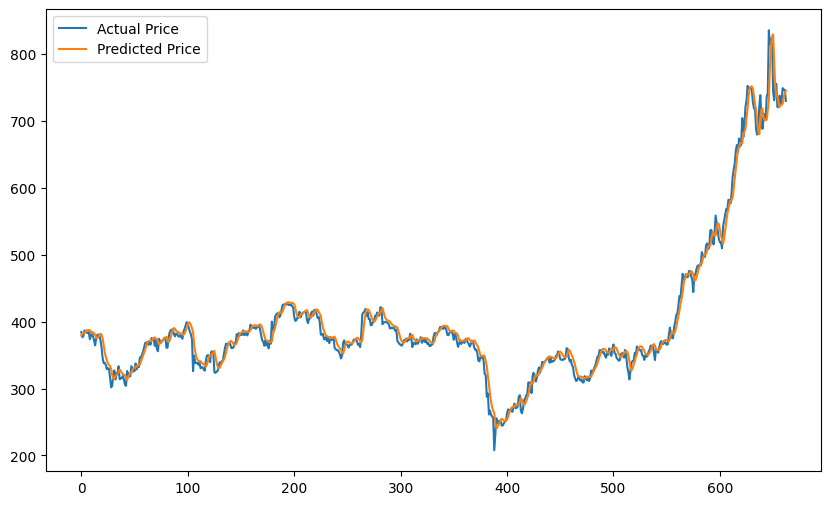

In [33]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Load stock data
csv_file_path = 'ADANIPORTS.csv'  # Path to your stock data CSV
stock_data = pd.read_csv(csv_file_path)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data[['Date', 'Close']]  # Using Date and Close columns

# Sort by date
stock_data = stock_data.sort_values('Date')

# Normalize the stock prices using MinMaxScaler
scaler_y = MinMaxScaler(feature_range=(0, 1))
stock_data['Close'] = scaler_y.fit_transform(stock_data[['Close']])

# Prepare the dataset: Use the last 10 days' stock prices to predict the next day
sequence_length = 10  # Use the last 10 days' stock prices to predict the next day
def prepare_data(stock_data, sequence_length):
    X = []
    y = []

    for i in range(len(stock_data) - sequence_length):
        X.append(stock_data['Close'].iloc[i:i + sequence_length].values)
        y.append(stock_data['Close'].iloc[i + sequence_length])  # The next day's price

    X = np.array(X)
    y = np.array(y)

    return X, y

# Prepare the data for training
X, y = prepare_data(stock_data, sequence_length)

# Reshape X for LSTM input
X = X.reshape((X.shape[0], X.shape[1], 1))  # (samples, time steps, features)

# Split the data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Make predictions for the test set (to evaluate model)
predictions = model.predict(X_test)

# Inverse scaling to get the predicted price back to original scale
predictions = scaler_y.inverse_transform(predictions)
y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Print predictions for May 1, 2021 (last date)
predicted_price = predictions[-1][0]
print(f"Predicted stock price for May 1, 2021: ${predicted_price:.2f}")

# Plot predictions vs actual values
plt.figure(figsize=(10,6))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.legend()
plt.show()

Padding with 3 empty images.
Padding prices with 3 values.
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0152
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.7029e-04
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.3754e-04
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 8.5454e-04
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 6.3221e-04
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 6.0253e-04
Epoch 9/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 7.5085e-04
Epoch 10/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.0454e-04
Epoch 11/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 5.0224e-04
Epoch 12/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.7509e-04
Epoch 13/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.9133e-04
Epoch 14/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.5416e-04
Epoch 15/20
83/83 ━━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.1752
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - loss: 0.0757
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - loss: 0.1009
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - loss: 0.0581
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - loss: 0.0709
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - loss: 0.0664
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - loss: 0.0584
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - loss: 0.0594
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - loss: 0.0621
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - loss: 0.0606
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - loss: 0.0583
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - loss: 0.0583
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - loss: 0.0597
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - loss: 0.0598
Epoch 15/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - loss: 0.0588
Epoch 16/20
1/1 ━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0226
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.1987e-04
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.3535e-04
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0016
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.8846e-04
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 7.6737e-04
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 6.8533e-04
Epoch 9/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 4.5036e-04
Epoch 10/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.5029e-04
Epoch 11/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.3663e-04
Epoch 12/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.8026e-04
Epoch 13/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.9863e-04
Epoch 14/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.1618e-04
Epoch 15/20
83/83 ━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0197
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.6476e-04
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.2585e-04
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.6739e-04
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.1048e-04
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.7947e-04
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.8105e-04
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.5730e-04
Epoch 9/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 6.0257e-04
Epoch 10/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.0927e-04
Epoch 11/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.2143e-04
Epoch 12/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.5321e-04
Epoch 13/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.4488e-04
Epoch 14/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.1156e-04
Epoch 15/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 

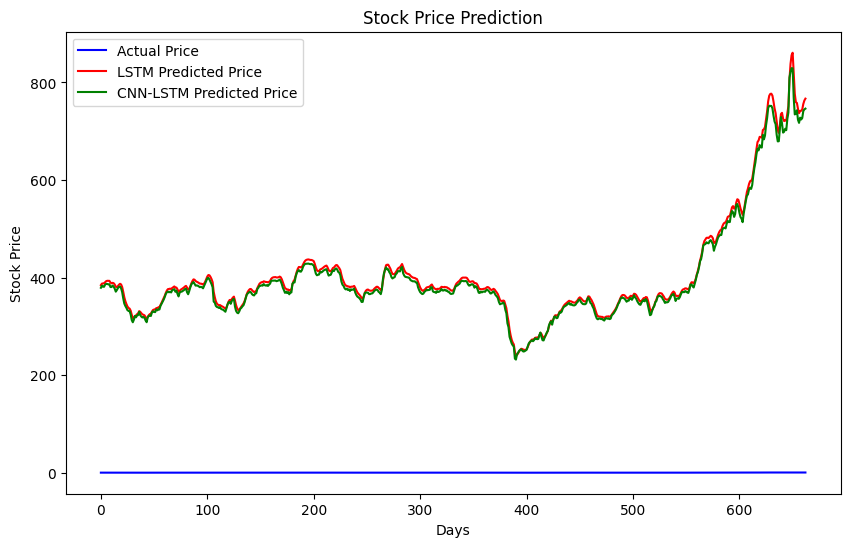

In [37]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv2D, MaxPooling2D, Flatten, TimeDistributed
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Load stock data
csv_file_path = 'ADANIPORTS.csv'  # Path to your stock data CSV
stock_data = pd.read_csv(csv_file_path)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data[['Date', 'Close']]  # Using Date and Close columns
stock_data = stock_data.sort_values('Date')

# Normalize the stock prices using MinMaxScaler
scaler_y = MinMaxScaler(feature_range=(0, 1))
stock_data['Close'] = scaler_y.fit_transform(stock_data[['Close']])

# Prepare the dataset: Use the last 10 days' stock prices to predict the next day
sequence_length = 10  # Use the last 10 days' stock prices to predict the next day
def prepare_data(stock_data, sequence_length):
    X = []
    y = []

    for i in range(len(stock_data) - sequence_length):
        X.append(stock_data['Close'].iloc[i:i + sequence_length].values)
        y.append(stock_data['Close'].iloc[i + sequence_length])  # The next day's price

    X = np.array(X)
    y = np.array(y)

    return X, y

# Prepare the data for training
X, y = prepare_data(stock_data, sequence_length)

# Reshape X for LSTM input
X = X.reshape((X.shape[0], X.shape[1], 1))  # (samples, time steps, features)

# Split the data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(50),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32)

# Make predictions for the last day in the test set
lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = scaler_y.inverse_transform(lstm_predictions)

# Build the CNN-LSTM model using the same stock price input
# Reshape X for CNN-LSTM input: add a new axis for channels
X_cnn_lstm = X.reshape((X.shape[0], X.shape[1], 1, 1))  # (samples, time steps, height, width)

# Build the CNN-LSTM model
cnn_lstm_model = Sequential([
    TimeDistributed(Conv2D(32, (1, 1), activation='relu'), input_shape=(sequence_length, 1, 1, 1)),  # Only prices
    TimeDistributed(MaxPooling2D((1, 1))),
    TimeDistributed(Flatten()),
    LSTM(50, return_sequences=False),
    Dense(1)
])

cnn_lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the CNN-LSTM model
cnn_lstm_model.fit(X_cnn_lstm[:train_size], y_train, epochs=20, batch_size=32)

# Make predictions for the last day in the test set
cnn_lstm_predictions = cnn_lstm_model.predict(X_cnn_lstm[train_size:])
cnn_lstm_predictions = scaler_y.inverse_transform(cnn_lstm_predictions)

# Compare predictions
predicted_price_lstm = lstm_predictions[-1][0]
predicted_price_cnn_lstm = cnn_lstm_predictions[-1][0]

print(f"Predicted stock price (LSTM) for May 1, 2021: ${predicted_price_lstm:.2f}")
print(f"Predicted stock price (CNN-LSTM) for May 1, 2021: ${predicted_price_cnn_lstm:.2f}")

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Price', color='blue')
plt.plot(lstm_predictions, label='LSTM Predicted Price', color='red')
plt.plot(cnn_lstm_predictions, label='CNN-LSTM Predicted Price', color='green')
plt.legend()
plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.show()